In [ ]:
#import the liberaries that we need for analysis
import pandas as pd #for dealing with dataframs
import numpy as np #for scientific compution and arraies
import matplotlib.pyplot as plt #fro visualization
import seaborn as sns #fro better visualization
%matplotlib inline

**DATA WRANGLING**

In [ ]:
# load the data and first look
df = pd.read_csv(r"/content/drive/MyDrive/ShagufProjects/P1-Shaguf.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
df.shape

(110527, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [ ]:
df.describe() #summary statistics

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

We don't need patient id or appointment id for analysis, so we will drop them

In [ ]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [ ]:
df.head() # make sure we droped them correctly

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


let's have a look at the Age

In [ ]:
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

I will check the datatypes of the columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No-show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


In [ ]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
# change scheduled day and appointment day to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [ ]:
df.info() # let's check the datatype again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Neighbourhood   110527 non-null  object        
 5   Scholarship     110527 non-null  int64         
 6   Hipertension    110527 non-null  int64         
 7   Diabetes        110527 non-null  int64         
 8   Alcoholism      110527 non-null  int64         
 9   Handcap         110527 non-null  int64         
 10  SMS_received    110527 non-null  int64         
 11  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


let's go more into the data and check the columns

In [ ]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [ ]:
df['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [ ]:
df['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [ ]:
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

Let's make it more clear through visualization

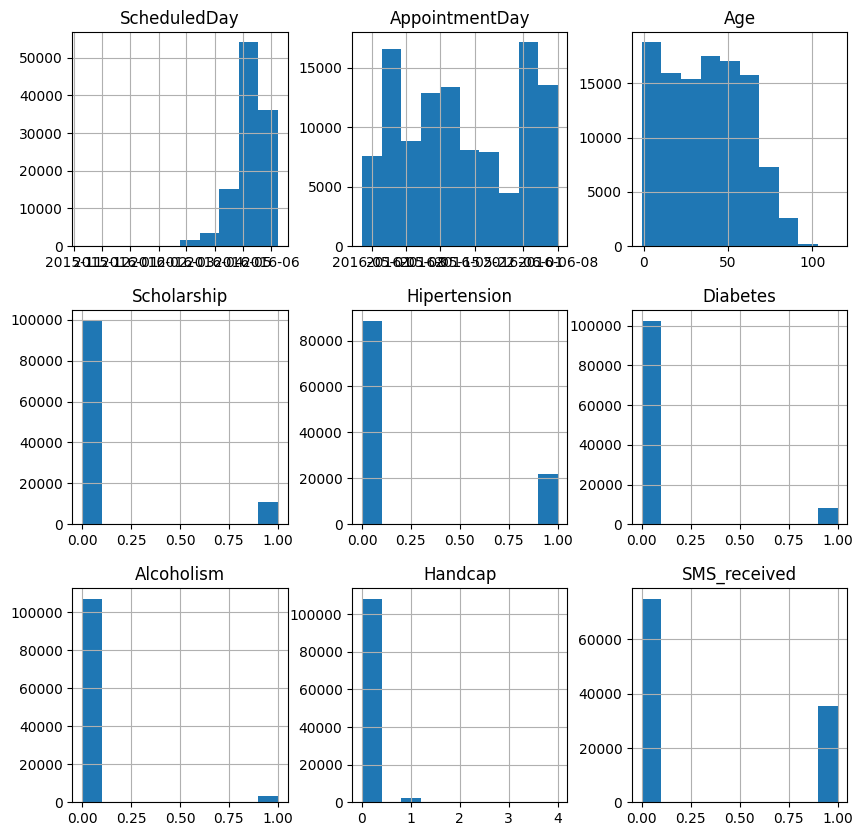

In [ ]:
df.hist(figsize=(10,10));

In [ ]:
# Rename incorrect columns names
df = df.rename(columns={'Handcap':'Handicap', 'Hipertension':'Hypertension'})
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'No-show'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Neighbourhood   110527 non-null  object        
 5   Scholarship     110527 non-null  int64         
 6   Hypertension    110527 non-null  int64         
 7   Diabetes        110527 non-null  int64         
 8   Alcoholism      110527 non-null  int64         
 9   Handicap        110527 non-null  int64         
 10  SMS_received    110527 non-null  int64         
 11  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


In [ ]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [ ]:
# Rename the No-show column to avoid misleading
df = df.rename(columns={'No-show':'Absent'})
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'Absent'],
      dtype='object')

**Exploratory Data Analysis**

Does the patient gender has a realation with the atendance?

In [ ]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

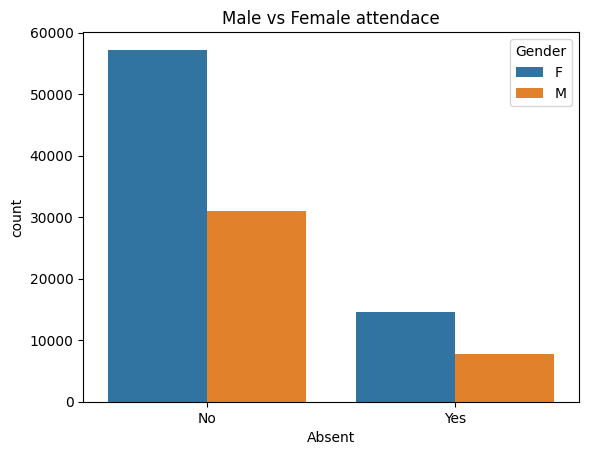

In [ ]:
sns.countplot(x=df['Absent'], hue=df['Gender']);
plt.title('Male vs Female attendace');

The number of females show up is greater than the males. May be because we have more data of females but that also show that they vist hospitals more in general.

Does the neighborhood play a role in making patients don't show up? "Location of the hospital"

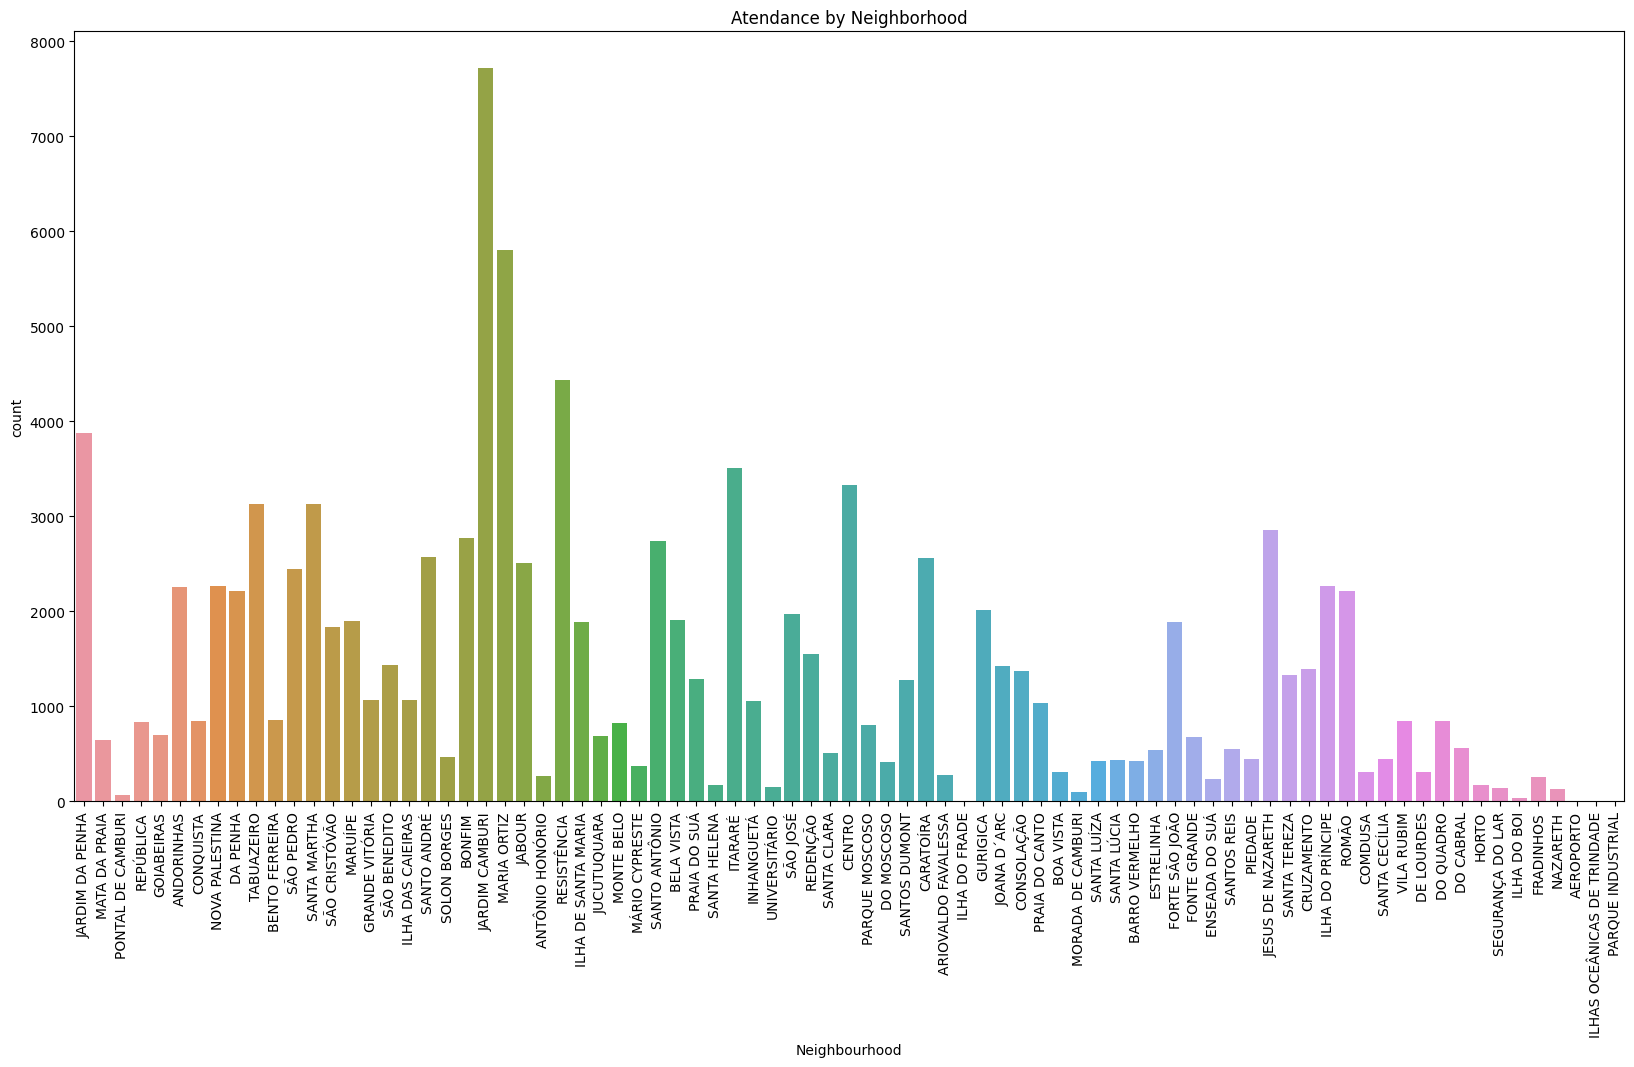

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=df.Neighbourhood);
plt.title('Atendance by Neighborhood')
plt.xticks(rotation=90);

We see that some neighborhood have more people show up for their appointment and this indicates that this area have increase in diseases.

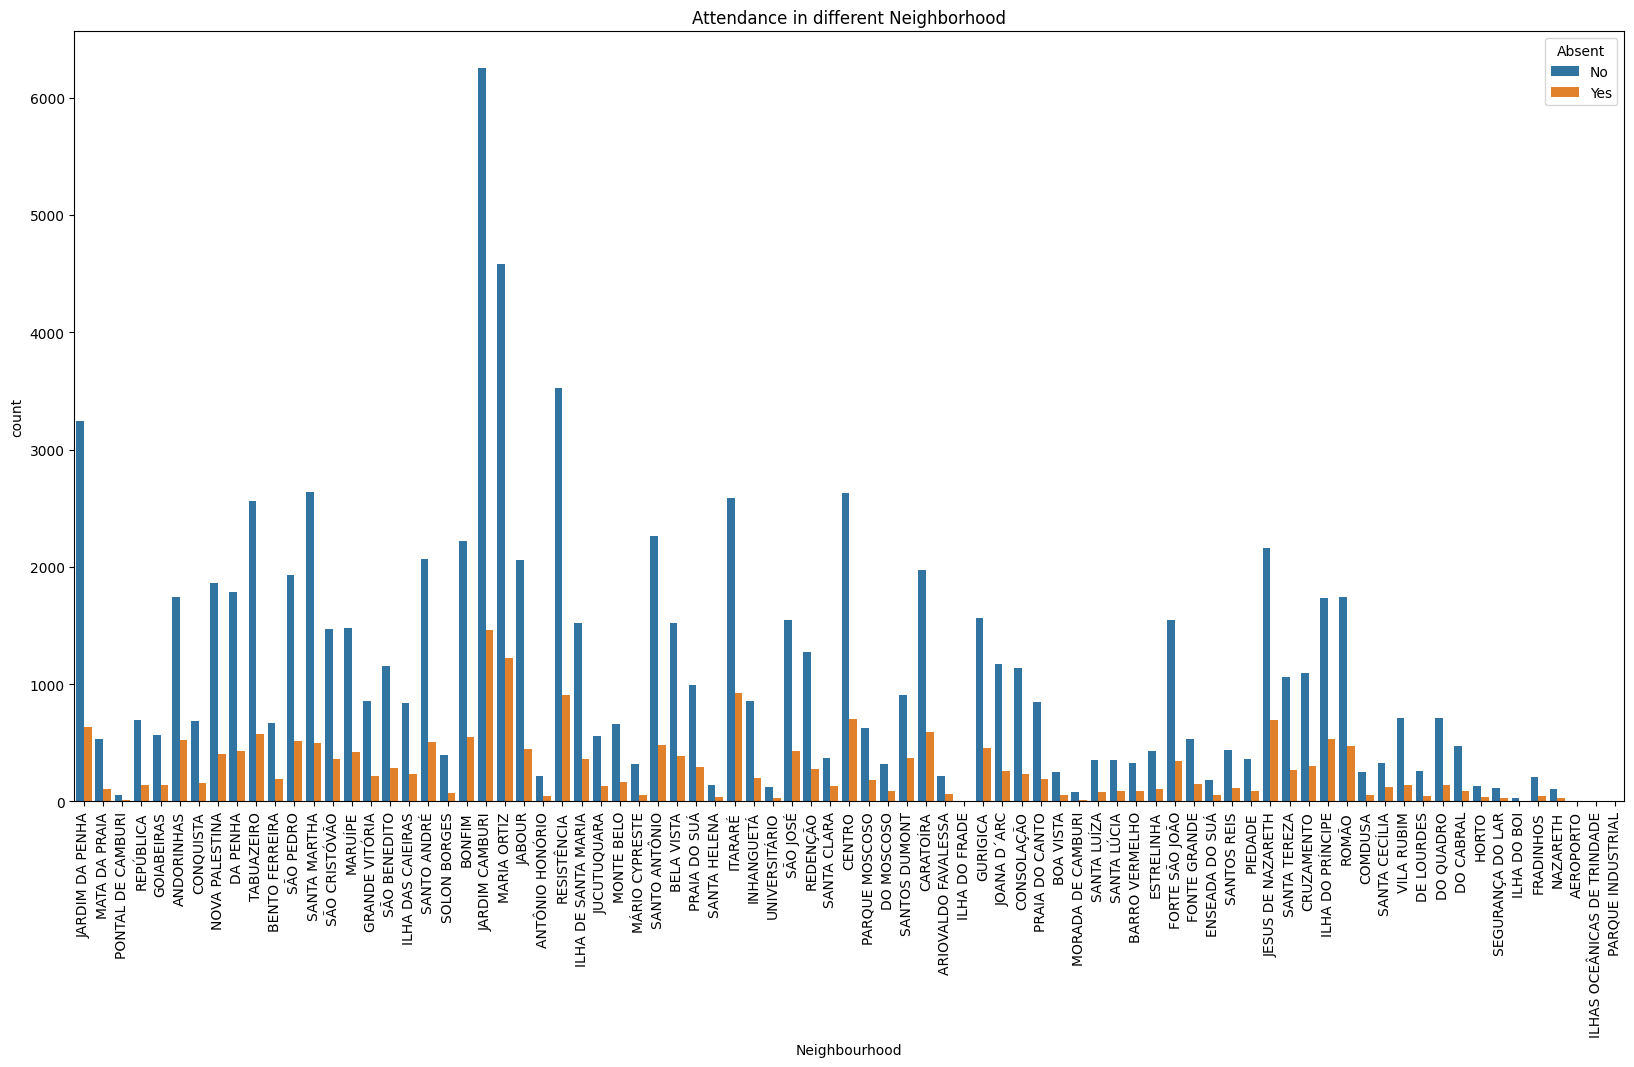

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x=df['Neighbourhood'], hue=df['Absent']);
plt.xticks(rotation=90);
plt.title('Attendance in different Neighborhood');

Which pateints show up more? Does old age take care of their health more than youth?

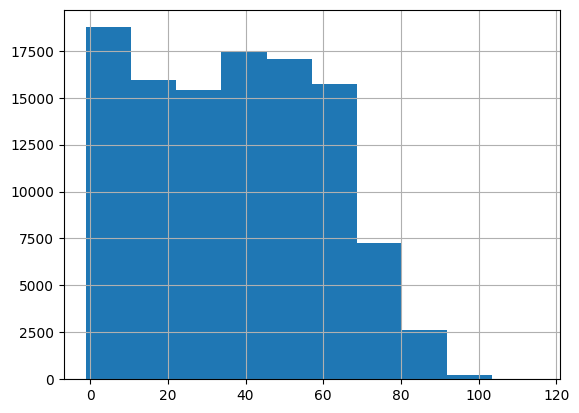

In [ ]:
df['Age'].hist(bins=10);

In [ ]:
df['Age'] = [round(a,-1) for a in df['Age']]
# this trick makes age easier as I divided them into segments to make it easier visualizing.

df['Age'].value_counts()

40     15960
60     15628
20     15342
50     14012
30     13026
0      11732
10     11526
70      7365
80      4776
90      1090
100       65
120        5
Name: Age, dtype: int64

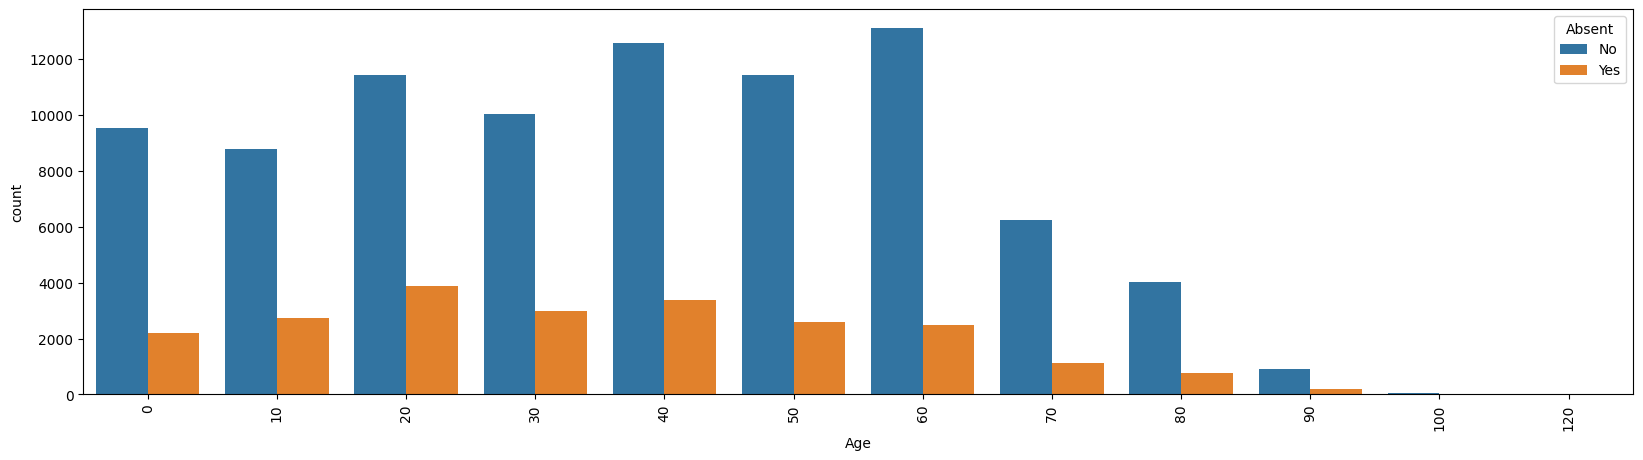

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x=df['Age'], hue=df['Absent'])
plt.xticks(rotation=90);

**Does the patient illness has a realation with the atendance?**
'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap'

In [ ]:
df['Hypertension'].sum()

21801

In [ ]:
df['Hypertension'].value_counts()

0    88726
1    21801
Name: Hypertension, dtype: int64

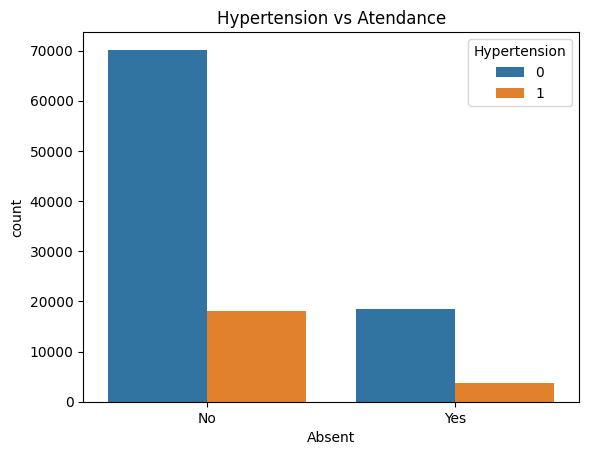

In [ ]:
# Hypertension realation with the atendance
sns.countplot(x=df['Absent'], hue=df['Hypertension']);
plt.title('Hypertension vs Atendance');

In [ ]:
df['Diabetes'].sum()

7943

In [ ]:
df['Diabetes'].value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

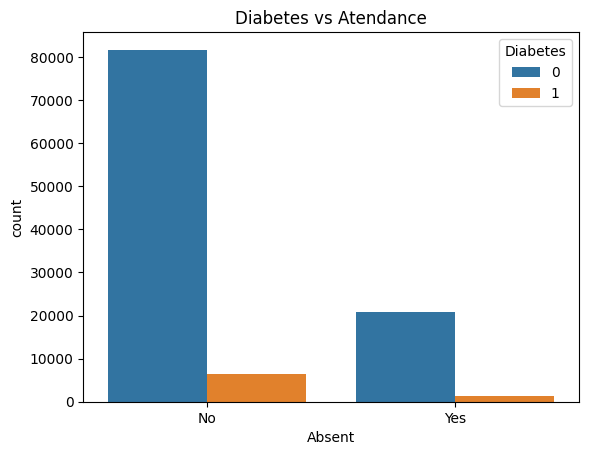

In [ ]:
# Diabetes realation with the atendance
sns.countplot(x=df['Absent'], hue=df['Diabetes']);
plt.title('Diabetes vs Atendance');

In [ ]:
df['Alcoholism'].sum()

3360

In [ ]:
df['Alcoholism'].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

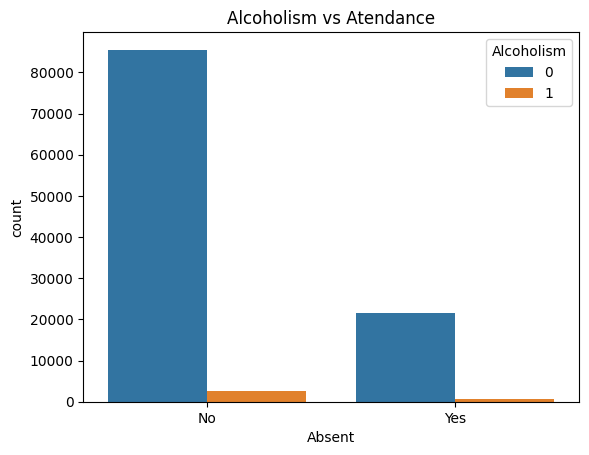

In [ ]:
# Alcoholism realation with the atendance
sns.countplot(x=df['Absent'], hue=df['Alcoholism']);
plt.title('Alcoholism vs Atendance');

In [ ]:
df['Handicap'].sum()

2459

In [ ]:
df['Handicap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

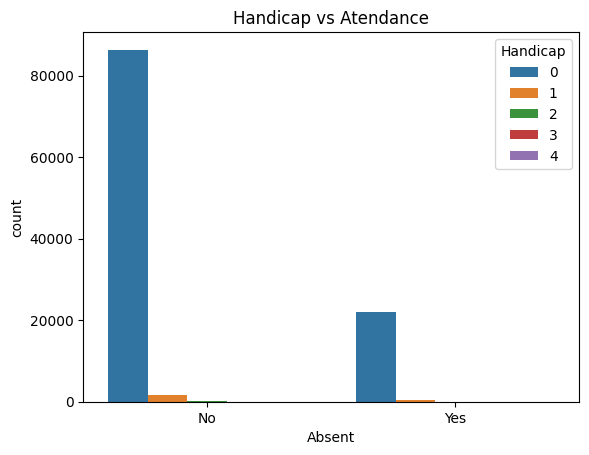

In [ ]:
# Handicap realation with the atendance
sns.countplot(x=df['Absent'], hue=df['Handicap']);
plt.title('Handicap vs Atendance');

From the results, the largest number of absentees were Hypertension patients. But given that they are the largest number of patients in the data set, we can say that the results are close!

**In general, attention should be paid to Hypertension patients, as they are the largest number of patients.**